<a href="https://colab.research.google.com/github/JamesChung821/python/blob/master/%E3%80%8CClassification_201024a_ipynb%E3%80%8D%E7%9A%84%E5%89%AF%E6%9C%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification

In [ ]:
# https://drive.google.com/file/d/153MnsWoh1hMhiq8vew2Z5O1oUqUR6Zk4/view?usp=sharing
!wget -O Raman_for_section_201025a.zip https://drive.google.com/u/0/uc?id=153MnsWoh1hMhiq8vew2Z5O1oUqUR6Zk4&export=download
!unzip Raman_for_section_201025a.zip

--2021-07-28 13:32:25--  https://drive.google.com/u/0/uc?id=153MnsWoh1hMhiq8vew2Z5O1oUqUR6Zk4
Resolving drive.google.com (drive.google.com)... 108.177.126.113, 108.177.126.138, 108.177.126.100, ...
Connecting to drive.google.com (drive.google.com)|108.177.126.113|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-08-as-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/j82jsrd5ns1f06uil7bj7q4lj466r3q9/1627479075000/05853657563322498013/*/153MnsWoh1hMhiq8vew2Z5O1oUqUR6Zk4 [following]
--2021-07-28 13:32:25--  https://doc-08-as-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/j82jsrd5ns1f06uil7bj7q4lj466r3q9/1627479075000/05853657563322498013/*/153MnsWoh1hMhiq8vew2Z5O1oUqUR6Zk4
Resolving doc-08-as-docs.googleusercontent.com (doc-08-as-docs.googleusercontent.com)... 108.177.126.132, 2a00:1450:4013:c01::84
Connecting to doc-08-as-docs.googleusercontent.com (doc-08-as-docs.googleusercontent.co

In [ ]:
import scipy.io as sio
import numpy.matlib as nm
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import joblib

# Performance metrics
from sklearn.metrics import r2_score, mean_squared_error, roc_auc_score, confusion_matrix, roc_curve

t = sio.loadmat('Raman_for_section_201025a.mat')

C_ = t['C'].astype(float)
C = C_;
C[:,0] = (C[:,0] - 17) / (34 - 17);
C[:,1] = (C[:,1] - 7) / (11 - 7);
Raman = t['Raman']
labels = t['labels'].squeeze() - 1

Set up the data. \
C is the composition for each sample \
labels is the phase region label for each sample. \
Raman is the Raman signature for each sample.

(36, 2) (36,) (36, 751)


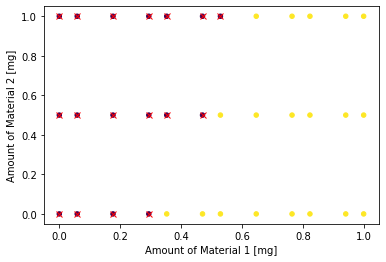

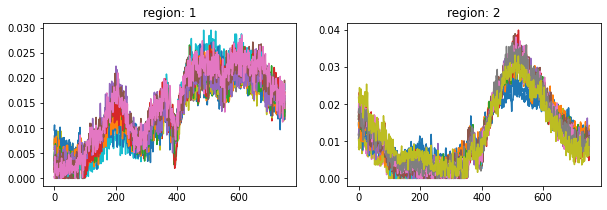

In [ ]:
print(C.shape, labels.shape, Raman.shape)
plt.figure()
plt.scatter(C[:,0],C[:,1],s = 20, c = labels)
plt.plot(C[labels == 1,0], C[labels == 1,1], 'rx')
plt.xlabel('Amount of Material 1 [mg]')
plt.ylabel('Amount of Material 2 [mg]')

plt.figure(figsize = (10,3))
for i in range(2):
  plt.subplot(1,2,i+1)
  k = labels == i + 1
  plt.plot(Raman[k,:].T)
  plt.title(f'region: {i+1}')
plt.show()

Looking at the spectra a different way

No handles with labels found to put in legend.


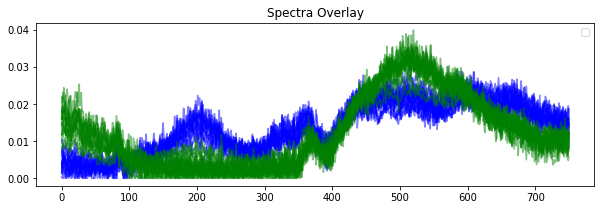

In [ ]:
cols = ["blue", "green"]
plt.figure(figsize = (10,3))
for i in range(2):
  k = labels == i + 1
  plt.plot(Raman[k,:].T, c=cols[i], alpha=0.5)

plt.title("Spectra Overlay")
plt.legend()
plt.show()

Let's remove some of the labels and see how the classification algorithms perform.

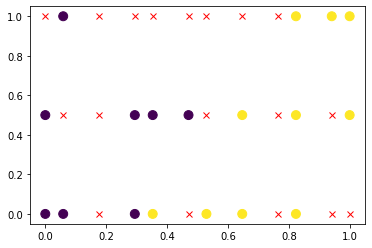

In [ ]:
from sklearn.model_selection import train_test_split

Ctrain, Ctest, Ltrain, Ltest = train_test_split(C, labels, test_size=0.5, random_state=0)

plt.figure()
plt.scatter(Ctrain[:,0],Ctrain[:,1],s = 80, c = Ltrain)
plt.plot(Ctest[:,0], Ctest[:,1], 'rx')


k-Nearest Neighbors

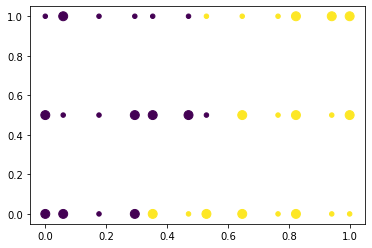

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=4)

# Train the model
model.fit(Ctrain,Ltrain)

#Predict Output
Ltest_pred = model.predict(Ctest) 

plt.figure()
plt.scatter(Ctrain[:,0],Ctrain[:,1],s = 80, c = Ltrain)
plt.scatter(Ctest[:,0], Ctest[:,1], s = 20, c = Ltest_pred)

Decision Tree

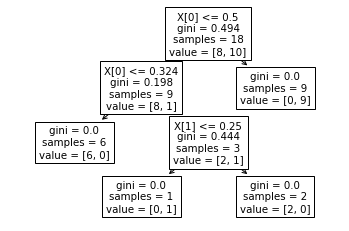

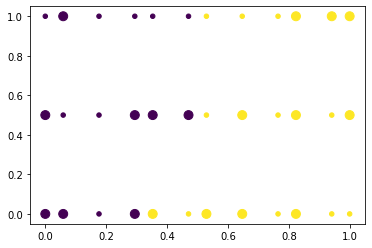

In [ ]:
from sklearn import tree
DT = tree.DecisionTreeClassifier().fit(Ctrain,Ltrain)
tree.plot_tree(DT)

Ltest_pred = DT.predict(Ctest)
plt.figure()
plt.scatter(Ctrain[:,0],Ctrain[:,1],s = 80, c = Ltrain)
plt.scatter(Ctest[:,0], Ctest[:,1], s = 20, c = Ltest_pred)

Gaussian Naive Bayes

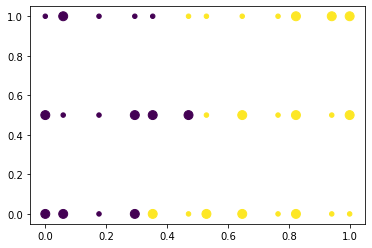

In [ ]:
from sklearn.naive_bayes import GaussianNB
Ltest_pred = GaussianNB().fit(Ctrain, Ltrain).predict(Ctest)

plt.figure()
plt.scatter(Ctrain[:,0],Ctrain[:,1],s = 80, c = Ltrain)
plt.scatter(Ctest[:,0], Ctest[:,1], s = 20, c = Ltest_pred)

Confusion Matrix and Performance Measures

In [ ]:
from sklearn.metrics import confusion_matrix

CM = confusion_matrix(Ltest, Ltest_pred)
print(CM)

tn, fp, fn, tp = confusion_matrix(Ltest, Ltest_pred).ravel()
print(f'TN:{tn}, FP:{fp}, FN:{fn}, TP:{tp}')
# Which is positive?

[[7 2]
 [0 9]]
TN:7, FP:2, FN:0, TP:9


Let's try implementing ROC AUC for RF's (try some of the other methods discussed above)

In [ ]:
# Solution here

Next plot AUC

In [ ]:
from sklearn.metrics import plot_roc_curve
# Rest of solution

Let's try to implement Random Forest (RF)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

Try a couple of different tuning parameters for the RF model. To reiterate, this is the most important part of using these types of models!!

In [ ]:
rf = RandomForestClassifier(n_estimators=100, max_depth=10)
rf.fit(Ctrain, Ltrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Exercise: generate predictions for the test sample and evaluate performance

In [ ]:
# Enter Solution Here

Working with just two variables elimanates potentially useful information that's available in the spectra. Let's try utilizing the Raman measurements.

First lets try visualizing the data

In [ ]:
class_cols = ["green" if l == 1 else "blue" for l in labels]

Text(0.5, 1.0, 'Intensities at index 200 & 525')

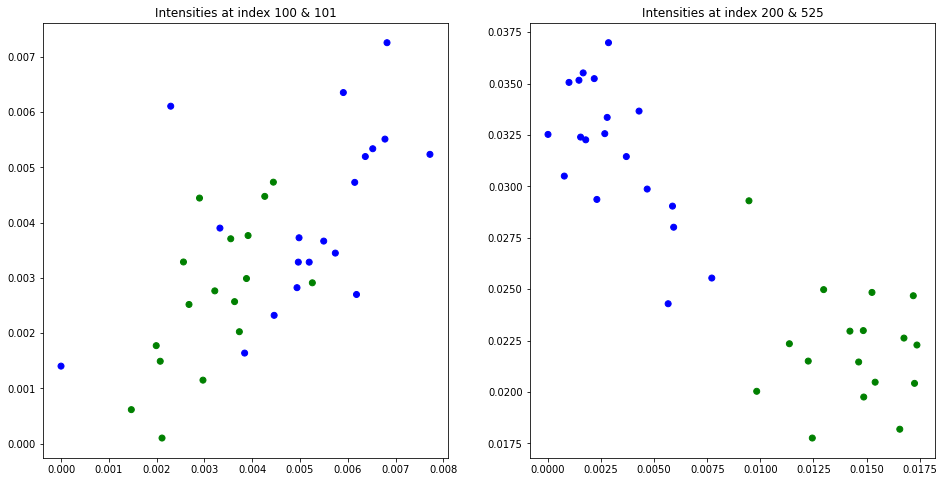

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8))
ax[0].scatter(Raman[:, 100], Raman[:, 101], c=class_cols)
ax[0].set_title("Intensities at index 100 & 101")

ax[1].scatter(Raman[:, 200], Raman[:, 525], c=class_cols)
ax[1].set_title("Intensities at index 200 & 525")


Next split into training and testing

In [ ]:
R_train, R_test, L_train, L_test = train_test_split(Raman, labels)

In [ ]:
print(f"Training sample dim = {R_train.shape} / Testing sample dim = {R_test.shape}")

Training sample dim = (27, 751) / Testing sample dim = (9, 751)


Run RF on the spectral data (try other methods as well!)

In [ ]:
rf_spectra = RandomForestClassifier(n_estimators=100, max_depth=10)
rf_spectra.fit(R_train, L_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Let's take a look at the feature importances

In [ ]:
importances = rf_spectra.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_spectra.estimators_], axis=0)

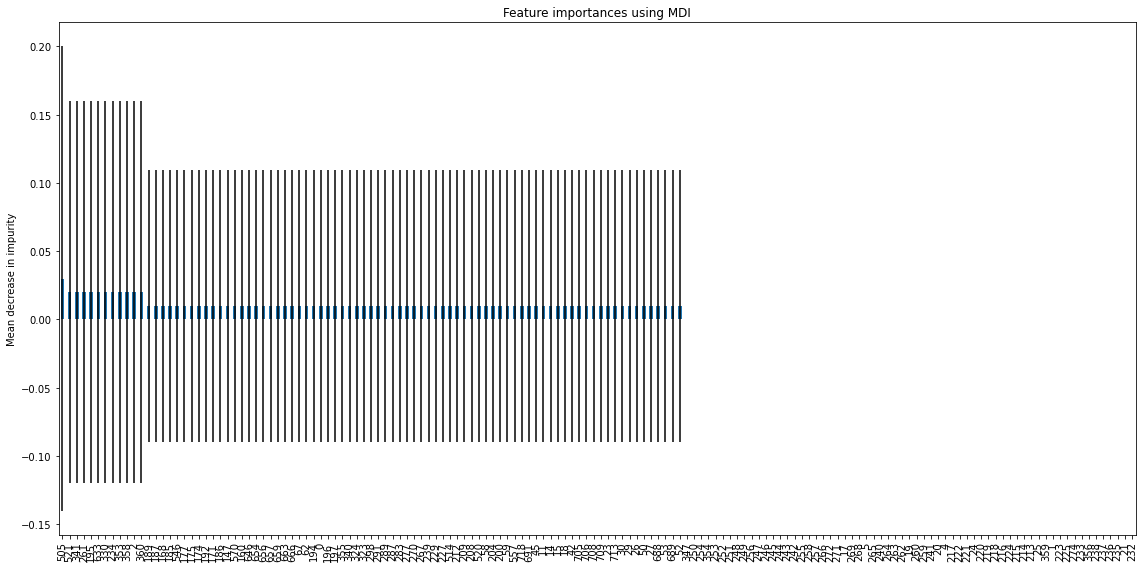

In [ ]:
forest_importances = pd.Series(importances, 
                               index=np.arange(Raman.shape[1], dtype=object)).\
                               sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(16, 8))
forest_importances.head(150).plot.bar(yerr=std[forest_importances.head(150).index.values], ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

No handles with labels found to put in legend.


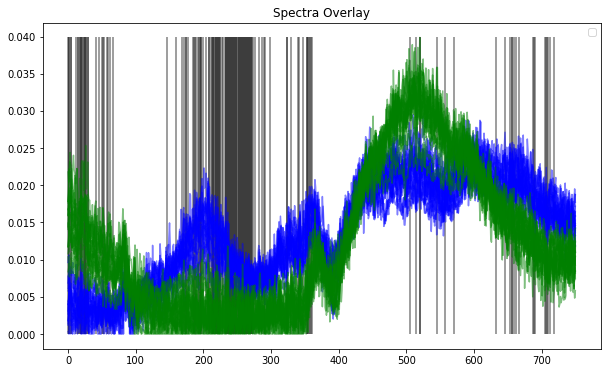

In [ ]:
cols = ["blue", "green"]
plt.figure(figsize = (10,6))
for i in range(2):
  k = labels == i + 1
  plt.plot(Raman[k,:].T, c=cols[i], alpha=0.5)

plt.title("Spectra Overlay")
plt.vlines(x=forest_importances.head(150).index.values, 
           ymin=Raman.min(), ymax=Raman.max(), alpha=0.5)
plt.legend()
plt.show()

Next, try importing and running gradient boosting (hint it's in the `ensemble` package in `sklearn`). 

Once you've gotten graident boosting import and play around with one/both of `xgboost` and `lightgbm` (note, this are both included in `colab`)

In [ ]:
# Solution

Try plotting the feature importance

In [ ]:
# Solution

Trying out logistic regression and LDA 

In [ ]:
from sklearn.linear_model import LogisticRegression

# Find and import LDA here


In [ ]:
lr = LogisticRegression(C=1e6)
lr.fit(R_train, L_train)

LogisticRegression(C=1000000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Text(0, 0.5, 'Coefficient Estimate')

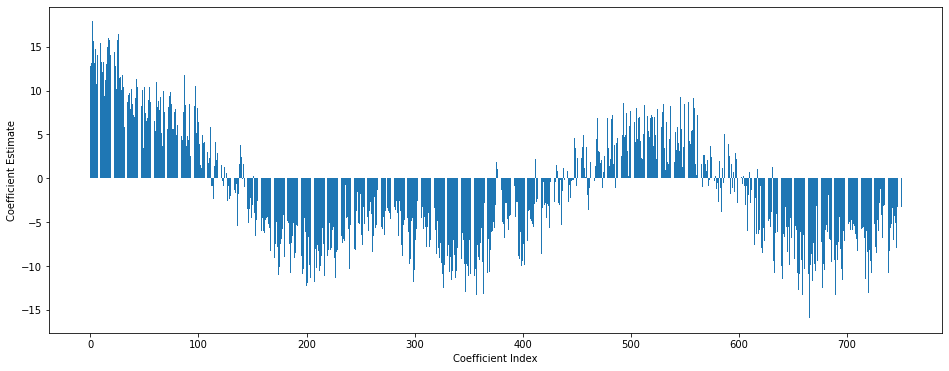

In [ ]:
plt.figure(figsize=(16, 6))
plt.bar(range(Raman.shape[1]), lr.coef_[0,:])
plt.xlabel("Coefficient Index")
plt.ylabel("Coefficient Estimate")

Next let's try introducing sparsity

In [ ]:
lr_sparse = LogisticRegression(C=100, penalty="l1", solver="liblinear")
lr_sparse.fit(R_train, L_train)

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

Text(0, 0.5, 'Coefficient Estimate')

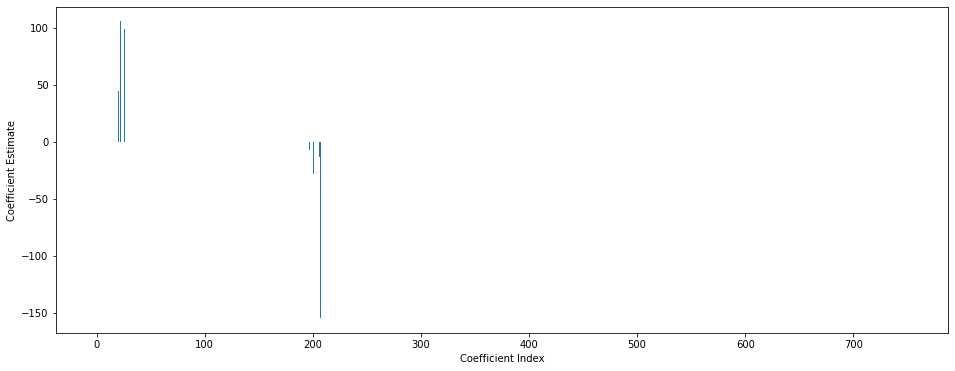

In [ ]:
plt.figure(figsize=(16, 6))
plt.bar(range(Raman.shape[1]), lr_sparse.coef_[0,:])
plt.xlabel("Coefficient Index")
plt.ylabel("Coefficient Estimate")

Exercise: find and import SVM

Let's try a neural network!

In [ ]:
# Working with PyTorch libraries
from torch import nn
import torch

PyTorch (and TensforFlow) require the creation of a `class` (you can think of this as a template for creating objects). The reason for this is that it is meant more as a "building" tool, than something pre-packaged

In [ ]:
class LogisticRegressionModel(nn.Module):
  def __init__(self, ndim: int):
    super(LogisticRegressionModel, self).__init__()
    # ndim in and one out
    self.linear = nn.Linear(ndim, 1)

  def forward(self, x):
    y_pred = torch.sigmoid(self.linear(x))
    return y_pred

We need to explicitly define how we're going to solve for the model weights. Here we're using a form of gradient descent called stochastic gradient descent (SGD). The benefit of the latter is that we can optimize our data in "chunks" which also allows for increased scalability.

In [ ]:
model = LogisticRegressionModel(Raman.shape[1])
learning_rate = 0.25
loss = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

We need to convert our numpy arrays to pytorch tensor objects. Then we need to  execute the optimization "manually"

In [ ]:
R_torch_train = torch.from_numpy(R_train.astype(np.float32))
R_torch_test = torch.from_numpy(R_test.astype(np.float32))

L_torch_train = torch.from_numpy(L_train.astype(np.float32)).reshape(-1, 1) - 1
L_torch_test = torch.from_numpy(L_test.astype(np.float32)).reshape(-1, 1) - 1

In [ ]:
model.train()
num_epochs = 1000
for epoch in range(num_epochs):
  #forward feed
  L_pred = model(R_torch_train)

  #calculate the loss
  err = loss(L_pred, L_torch_train)

  #backward propagation: calculate gradients
  err.backward()

  #update the weights
  optimizer.step()

  #clear out the gradients from the last step loss.backward()
  optimizer.zero_grad()
  
  print('epoch {}, loss {}'.format(epoch, err.item()))

Let's try a simple neural network

In [ ]:
class NeuralNetworkModel(nn.Module):

  def __init__(self, ndim: int, layer_dim: int):
    super(NeuralNetworkModel, self).__init__()
    # ndim in and one out
    self.linear1 = nn.Linear(ndim, layer_dim)
    self.linear2 = nn.Linear(layer_dim, 1)
    self.tanh = nn.Tanh()

  def forward(self, x):
    x = self.tanh(self.linear1(x))
    y_pred = torch.sigmoid(self.linear2(x))
    return y_pred

In [ ]:
nn_model = NeuralNetworkModel(Raman.shape[1], 32)
learning_rate = 0.1
loss = nn.BCELoss()
optimizer = torch.optim.SGD(nn_model.parameters(), lr = learning_rate, weight_decay=1e-5)

In [ ]:
nn_model.train()
num_epochs = 1000
for epoch in range(num_epochs):
  #forward feed
  L_pred = nn_model(R_torch_train)

  #calculate the loss
  err = loss(L_pred, L_torch_train)

  #backward propagation: calculate gradients
  err.backward()

  #update the weights
  optimizer.step()

  #clear out the gradients from the last step loss.backward()
  optimizer.zero_grad()
  
  print('epoch {}, loss {}'.format(epoch, err.item()))

How many weights are we estimating in the first layer

In [ ]:
nn_model.linear1.weight.shape

torch.Size([32, 751])

How many in second layer?

In [ ]:
nn_model.linear2.weight.shape

torch.Size([1, 32])

In [ ]:
model.eval()
model(R_torch_test)

tensor([[0.5887],
        [0.4128],
        [0.3255],
        [0.3700],
        [0.3446],
        [0.7770],
        [0.7748],
        [0.3599],
        [0.4161]], grad_fn=<SigmoidBackward>)

In [ ]:
nn_model.eval()
nn_model(R_torch_test)

tensor([[0.6243],
        [0.1581],
        [0.0561],
        [0.0981],
        [0.0718],
        [0.9612],
        [0.9600],
        [0.0867],
        [0.1626]], grad_fn=<SigmoidBackward>)

In [ ]:
L_torch_test

tensor([[2.],
        [1.],
        [1.],
        [1.],
        [1.],
        [2.],
        [2.],
        [1.],
        [1.]])